## SUPERMARKET CUSTOMER DATA CLEANING

In [720]:
# Import All Function That Need To Clean The Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import statsmodels.api as sm
import phik
from phik.report import plot_correlation_matrix
from phik import report
import math
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, lognorm, kstest

import warnings
warnings.filterwarnings("ignore")

In [721]:
# Import & Load CSV datasheet

df = pd.read_csv(r'D:\Materi Python Notion\Modul 2\Capstone 2\Supermarket Customers.csv', delimiter ='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## 1. Data Understanding and Cleaning

Before we go to data analysis, we have to understand about our dataset with the *"data understanding"* step. In this process, we will find out if any data anomalies in that dataset and find the solution to that anomalies with the *"data cleaning"*. Each anomaly handling will always with a justification of with steps taken, both in terms of *domain knowledge* and statistically.

First, let's look at the age information from the *"Supermarket Customers"* dataset.

In [722]:
# Checks for non null data and data types of dataset 

print(f'The number of rows and columns in the dataset df is {df.shape}')
df.info()

The number of rows and columns in the dataset df is (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240

In [723]:
# Performs checks for each columns summaries

display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [724]:
print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (2240, 29)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,ID,int64,0.000000,False,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.000000,False,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0.000000,False,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0.000000,False,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1.071429,False,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0.000000,False,3,"[0, 1, 2]"
6,Teenhome,int64,0.000000,False,3,"[0, 1, 2]"
7,Dt_Customer,object,0.000000,False,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,int64,0.000000,False,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0.000000,False,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


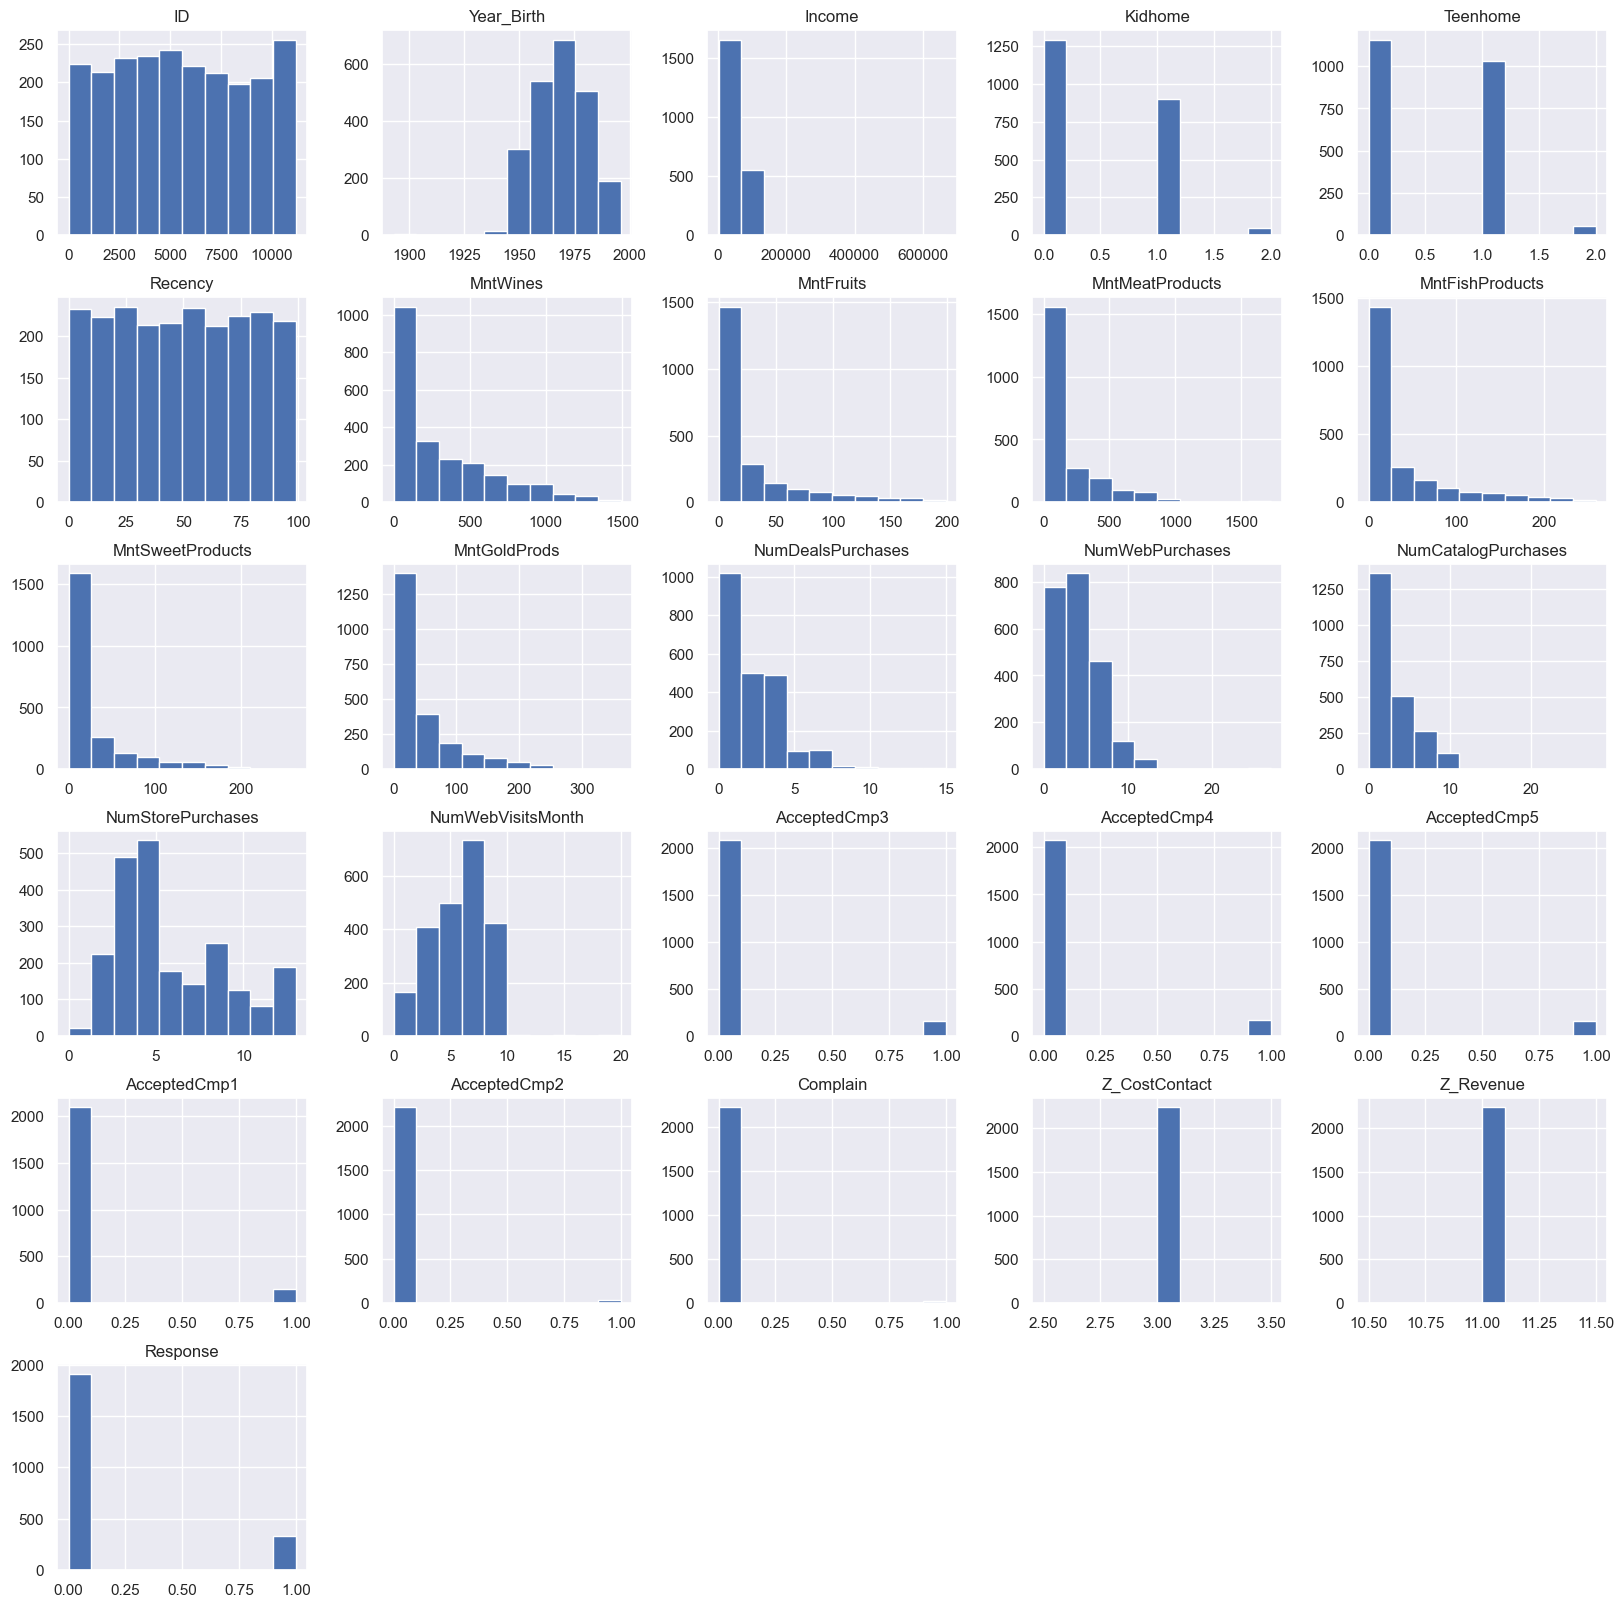

In [725]:
#Plot histograms of columns
df.hist(figsize=(20,20))
plt.show()

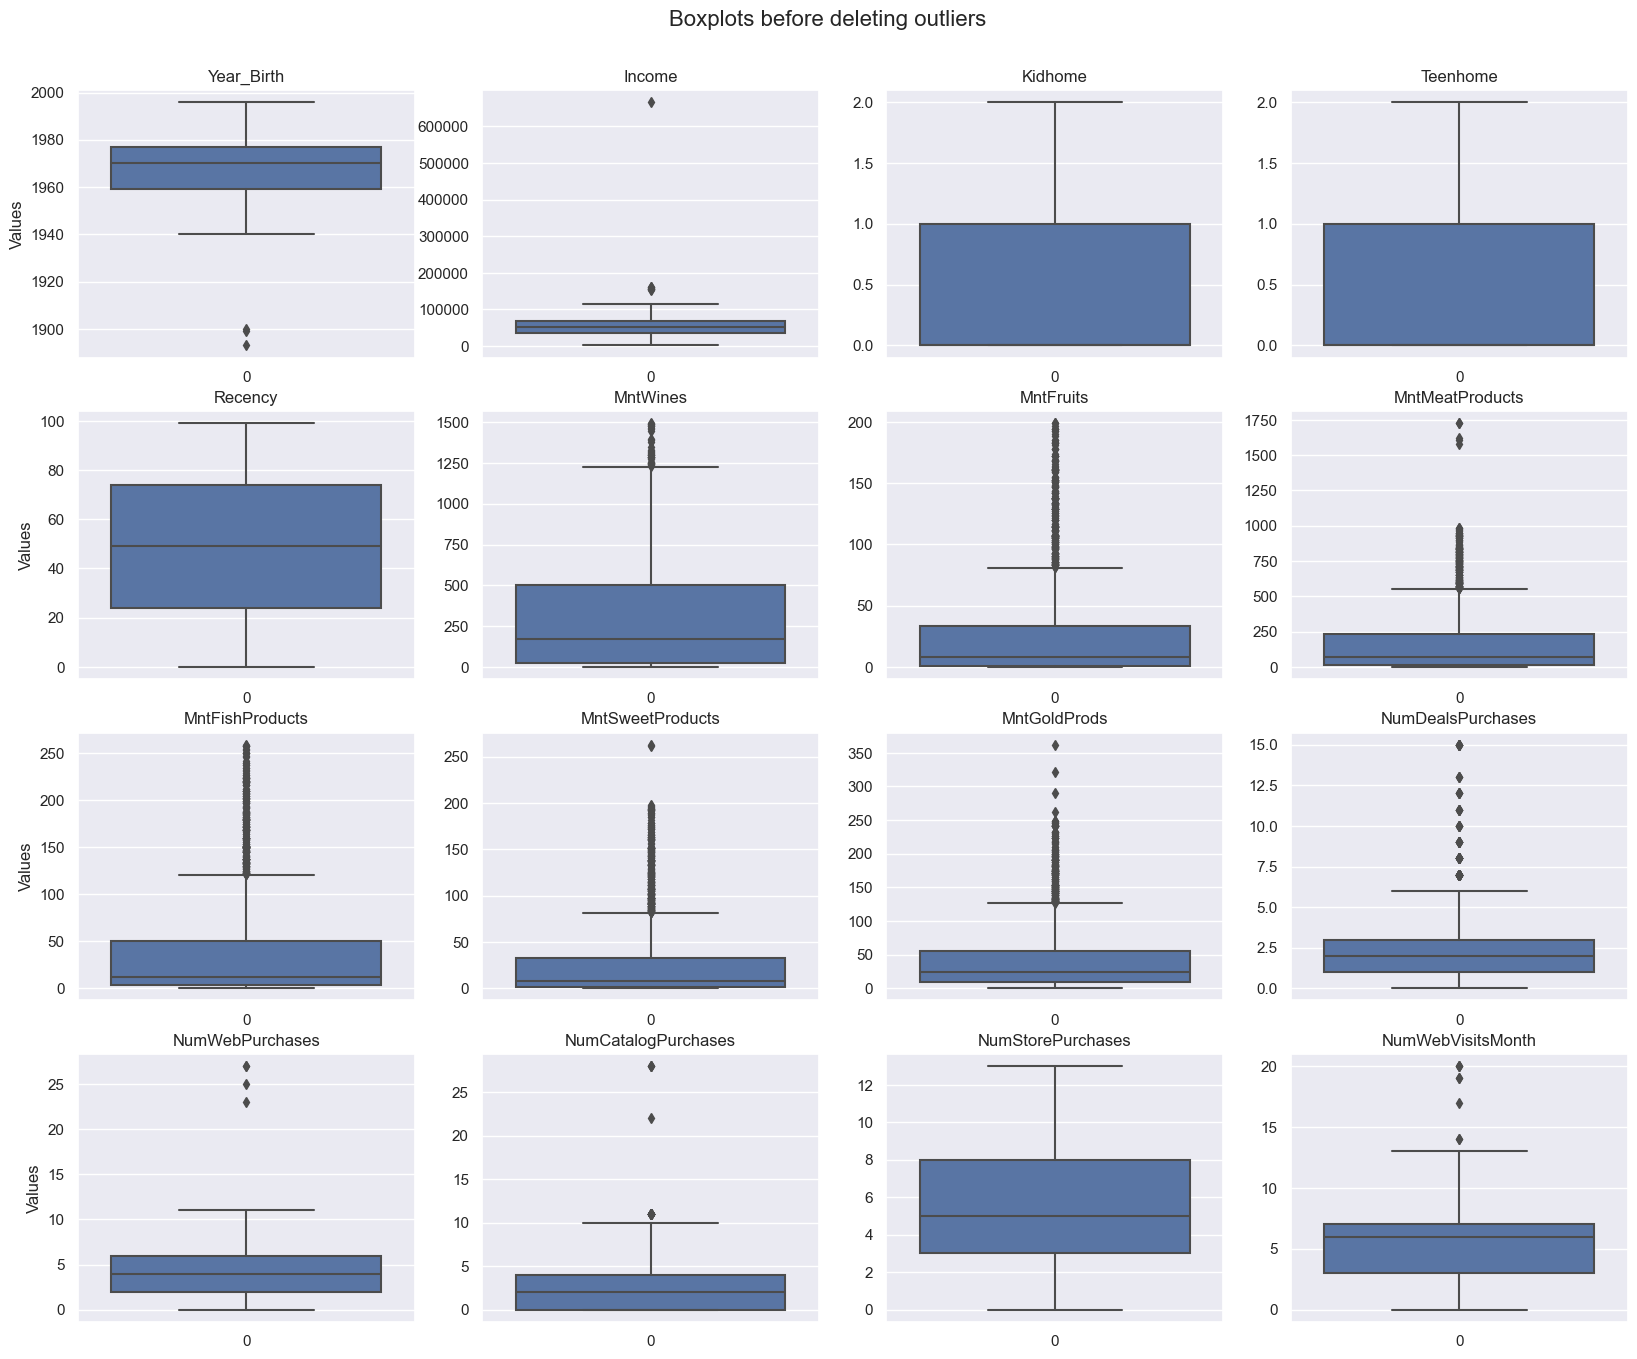

In [726]:
#list numeric columns of the data set
numeric_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=4, suptitle='Boxplots before deleting outliers')

Based on a quick check, there are some suspicions for the data that needs to be cleaned up :
* Wrong Type Data Format
* Zero Value ID
* Missing Value Data
* Outliers Data

## 2. Handling Wrong Type Data Format

After observation the data, there are data types for a column that still not correct. The column of **Dt_Customer** should be on datetime format not an object

In [727]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


## 3. Handling Zero Value ID with random ID

In [728]:
# Check if any data with zero value ID
df.loc[df['ID'] == 0]

# generates random integer number to fill that zero value ID
id = [id for id in df['ID']]
np.random.seed(22)
id_0 = 0
while True:
    randomnumber = np.random.randint(low=1, high=10000)
    if randomnumber not in id:
        id_0 += randomnumber
        break
    else:
        continue

# replacing zero value
df['ID'] = df['ID'].replace(0,id_0)
df.loc[df['ID'] == id_0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,6277,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,1,0,0,0,0,0,0,3,11,0


## 4. Handling Duplicated Data

In [729]:
# Checking if any duplicate data from database (not found any duplicate data on datasheet)

df[df.duplicated()]
df[df.duplicated()].shape[0]

0

## 5. Handling Missing Value Data

<Axes: >

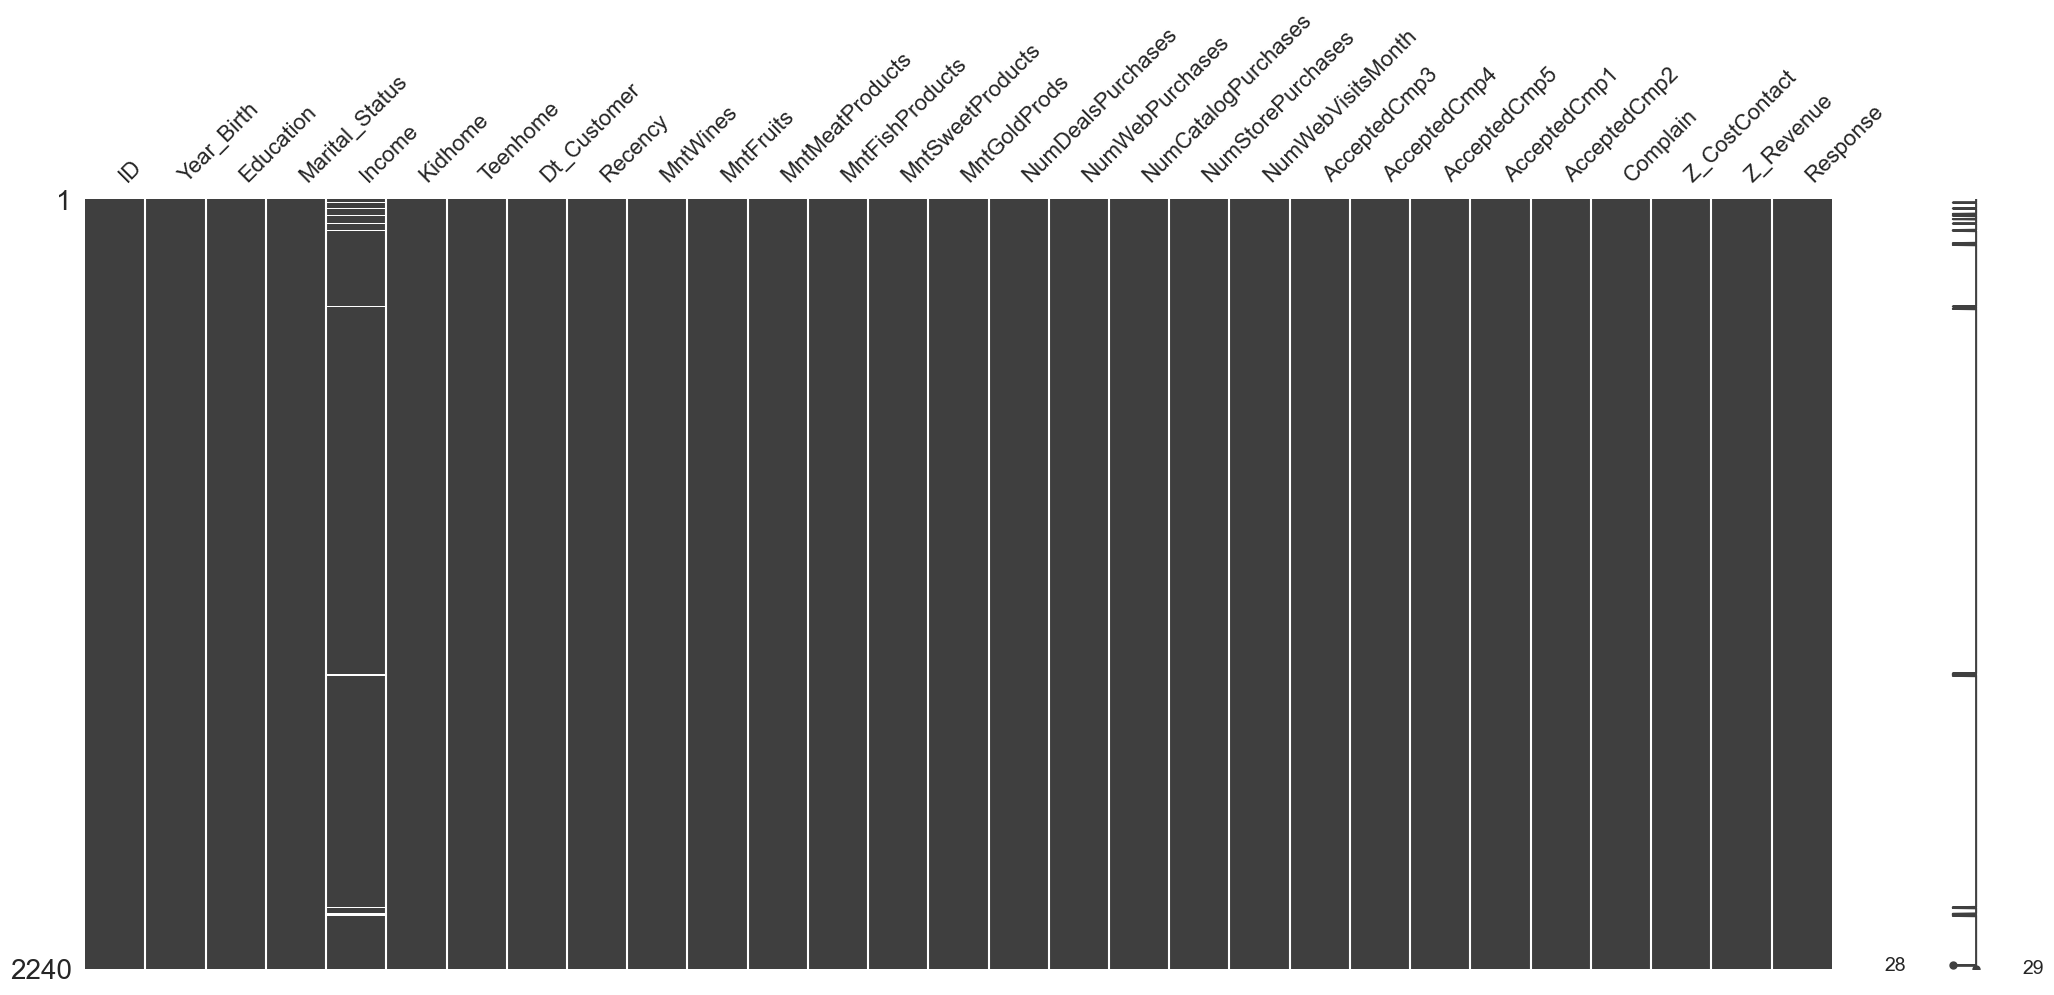

In [730]:
# Cheking if any missing value from the database

msno.matrix(df)

In [731]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [732]:
missingvalIncome = df.isna()['Income'].sum()

print (f'there are some missing value as much as {missingvalIncome} rows in Income column')

there are some missing value as much as 24 rows in Income column


In [733]:
# describe value in column income before fill the missing value
IncomeBefore = df.Income.describe()
IncomeBefore

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

To fill the missing value in Income column we check first for the correlations with another columns,which columns have high correlation with Income data

interval columns not set, guessing: ['Year_Birth', 'Income']


interval columns not set, guessing: ['Year_Birth', 'Income']


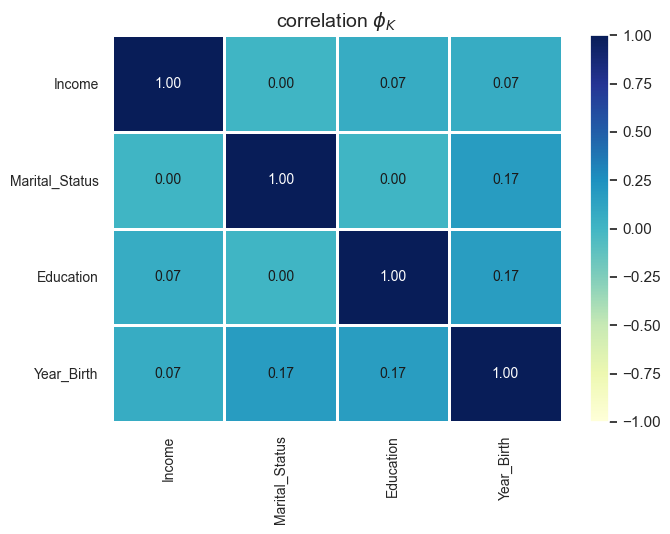

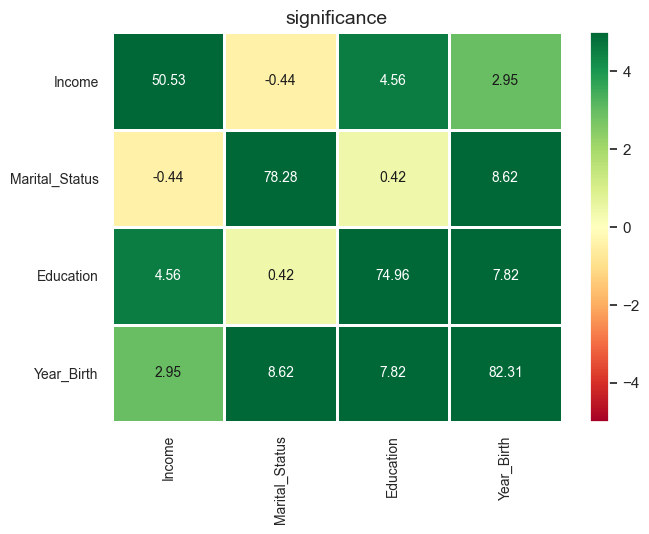

In [734]:
# Find out the data correlations to fill the missing value data

df2 = df[['Year_Birth','Education', 'Marital_Status', 'Income']]

phik_overview = df2.phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=-1, vmax=1, color_map="YlGnBu", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(7, 5.5))
plt.tight_layout()

significance_overview = df2.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1, figsize=(7,5.5))
plt.tight_layout()

* After check the correlation & Significance, found that there are high correlation between **income** with **Year_Birth** and **Education**
* Correlation Checking :
1. The correlation value between **Income** and **Year_Birth** is **0.07**
2. The correlation value between **Income** and **Eduaction** is **0.07**
* Significance Checking :
1. The significance value between **Income** and **Year_Birth** is **3.01**
2. The significance value between **Income** and **Education** is **4.53**

We will fill the missing value Income column by using the correlation between Income and Year_Birth & Education with below methods.

In [735]:
# Create Age Column, need to help missing value counting (Assume that the real age we count from the last year customer registrations.)
df.insert(2, column="Age", value=2014-df['Year_Birth'])
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0


In [736]:
# Checking the Age column value Quantile (min, Q1, Q2, Q3, max)
dfAge = df.Age
dfAge.describe(include="all")

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

Create grouping the age as "Age_categories" based on Indonesian Ministry of Health there are 9 categories of age, below is the details,
the reference can be accessed [click here](https://www.banjarsari-labuhanhaji.desa.id/artikel/2022/6/10/kelompok-umur-balita-kanak-kanak-remaja-dewasa-dan-lanjut-usia).


1. Toddler (Less Than 5 Years Old);

2. Children (5-11 Years Old);

3. Early Teenage (12-16 Years Old);

4. Late Teenage (17-25 Years Old);

5. Early Adult (26-35 Years Old);

6. Late Adult (36-45 Years Old);

7. Early Elderly (46-55 Years Old);

8. Late Elderly (56-65 Years Old) dan

9. Old (65 Years Old Above).

For Each Category Early and Late we combine to 1 categories, for example *Early Teenage* and *Late Teenage* we combine as *Teenage* as well as others.

In [737]:
# Create Grouping for Age Category based of Quantile and create the column

def labelage(x):
    if x <= 5:
        return '1. Toddler'
    elif x <= 11:
        return '2. Children'
    elif x <= 25 :
        return '3. Teenage'
    elif x <= 45:
        return '4. Adult'
    elif x <= 65 :
        return '5. Elderly'
    else:
        return '6. Old'
    
df.insert(3, column='Age_category', value=df['Age'].apply(labelage))

df.head ()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,5. Elderly,Graduation,Single,58138.0,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,5. Elderly,Graduation,Single,46344.0,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,5. Elderly,Graduation,Together,71613.0,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,4. Adult,Graduation,Together,26646.0,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,4. Adult,PhD,Married,58293.0,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0


* Check the normality test of the Income column how to find the value of missing value of **Income** & **Year_Birth**

Median: 51381.5


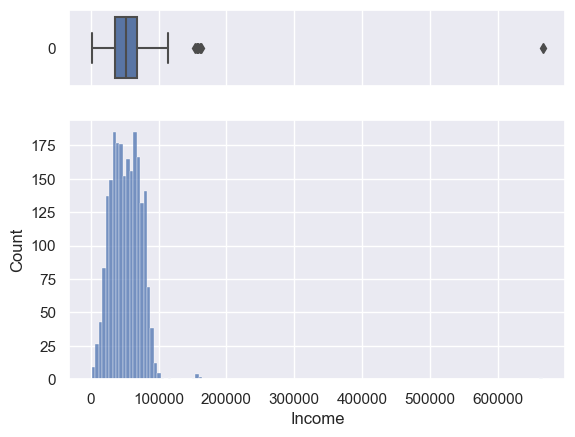

KstestResult(statistic=0.8306304603542572, pvalue=0.0, statistic_location=True, statistic_sign=-1)

In [738]:
# Check Normalitas Income 

# Price variable 
print(f'Median: {df.Income.median()}')
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["Income"], ax=ax_box, orient='h')
sns.histplot(data=df, x="Income", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

kstest(~df['Income'].isna(), 'norm')

Median: 1970.0


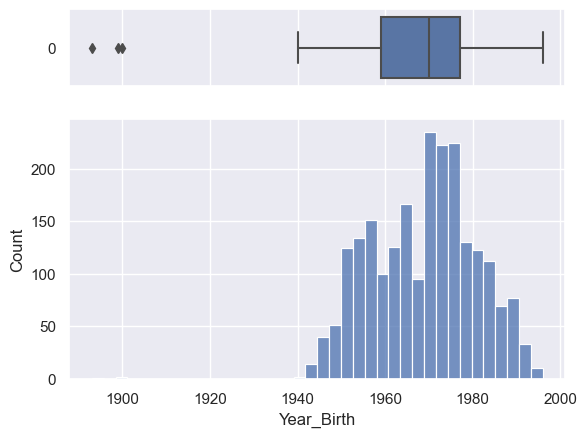

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1893, statistic_sign=-1)

In [739]:
# Check Normalitas Year_Birth

# Price variable 
print(f'Median: {df.Year_Birth.median()}')
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["Year_Birth"], ax=ax_box, orient='h')
sns.histplot(data=df, x="Year_Birth", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

kstest(df['Year_Birth'], 'norm')

Based on the results of checking the normal distribution on the **Income & Year_Birth** columns. shows that both columns are included in the non-normal distribution
 with a p-value of both columns is 0, and has a some number of data outliers, therefore we use the **median** to input missing value data.

In [740]:
dfIncomesrc = df.query("~Income.isna()")[['Age_category', 'Education', 'Income']].groupby(['Age_category','Education']).agg(median_income=('Income', 'median')).reset_index()
dfIncomesrc

,Age_category,Education,median_income
0,3. Teenage,2n Cycle,55155.0
1,3. Teenage,Basic,17371.5
2,3. Teenage,Graduation,44399.0
3,3. Teenage,Master,89529.0
4,3. Teenage,PhD,68404.0
5,4. Adult,2n Cycle,36425.5
6,4. Adult,Basic,20425.0
7,4. Adult,Graduation,44421.0
8,4. Adult,Master,44239.0
9,4. Adult,PhD,52402.0


In [741]:
# Add Median Value for The Income that will be processed to fill the missing value 

join_df = pd.merge(df,dfIncomesrc, on = ['Age_category','Education'], how = 'left')
join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income
0,5524,1957,57,5. Elderly,Graduation,Single,58138.0,0,0,2012-09-04,...,0,0,0,0,0,0,3,11,1,57811.0
1,2174,1954,60,5. Elderly,Graduation,Single,46344.0,1,1,2014-03-08,...,0,0,0,0,0,0,3,11,0,57811.0
2,4141,1965,49,5. Elderly,Graduation,Together,71613.0,0,0,2013-08-21,...,0,0,0,0,0,0,3,11,0,57811.0
3,6182,1984,30,4. Adult,Graduation,Together,26646.0,1,0,2014-02-10,...,0,0,0,0,0,0,3,11,0,44421.0
4,5324,1981,33,4. Adult,PhD,Married,58293.0,1,0,2014-01-19,...,0,0,0,0,0,0,3,11,0,52402.0


In [742]:
# Check the Missing Value for Income, There are 24 NaN value need to fill the value.

join_df[join_df.Income.isna()]

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income
10,1994,1983,31,4. Adult,Graduation,Married,NaN,1,0,2013-11-15,...,0,0,0,0,0,0,3,11,0,44421.0
27,5255,1986,28,4. Adult,Graduation,Single,NaN,1,0,2013-02-20,...,0,0,0,0,0,0,3,11,0,44421.0
43,7281,1959,55,5. Elderly,PhD,Single,NaN,0,0,2013-11-05,...,0,0,0,0,0,0,3,11,0,55257.5
48,7244,1951,63,5. Elderly,Graduation,Single,NaN,2,1,2014-01-01,...,0,0,0,0,0,0,3,11,0,57811.0
58,8557,1982,32,4. Adult,Graduation,Single,NaN,1,0,2013-06-17,...,0,0,0,0,0,0,3,11,0,44421.0
71,10629,1973,41,4. Adult,2n Cycle,Married,NaN,1,0,2012-09-14,...,0,0,0,0,0,0,3,11,0,36425.5
90,8996,1957,57,5. Elderly,PhD,Married,NaN,2,1,2012-11-19,...,0,0,0,0,0,0,3,11,0,55257.5
91,9235,1957,57,5. Elderly,Graduation,Single,NaN,1,1,2014-05-27,...,0,0,0,0,0,0,3,11,0,57811.0
92,5798,1973,41,4. Adult,Master,Together,NaN,0,0,2013-11-23,...,0,0,0,0,0,0,3,11,0,44239.0
128,8268,1961,53,5. Elderly,PhD,Married,NaN,0,1,2013-07-11,...,0,0,0,0,0,0,3,11,0,55257.5


In [743]:
# entered the median income data for each NaN / Missing Value, according to the each category

for i in range (len(join_df)):
    if len(str(join_df.Income[i])) == 3:
        join_df.Income[i] = join_df.median_income[i]
    else:
        continue

In [744]:
join_df[join_df.Income.isna()]
join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,median_income
0,5524,1957,57,5. Elderly,Graduation,Single,58138.0,0,0,2012-09-04,...,0,0,0,0,0,0,3,11,1,57811.0
1,2174,1954,60,5. Elderly,Graduation,Single,46344.0,1,1,2014-03-08,...,0,0,0,0,0,0,3,11,0,57811.0
2,4141,1965,49,5. Elderly,Graduation,Together,71613.0,0,0,2013-08-21,...,0,0,0,0,0,0,3,11,0,57811.0
3,6182,1984,30,4. Adult,Graduation,Together,26646.0,1,0,2014-02-10,...,0,0,0,0,0,0,3,11,0,44421.0
4,5324,1981,33,4. Adult,PhD,Married,58293.0,1,0,2014-01-19,...,0,0,0,0,0,0,3,11,0,52402.0


In [745]:
# Makesure the missing value of column Income have be filled in

dfnanIncome = join_df.query("Income.isna()")[['Age_category', 'Education', 'Income']]
dfnanIncome

,Age_category,Education,Income


* There is no missing value in the income column by filling in the median value in each income category that has been determined.
* Now we make comparison before and after filling the missing value data

In [746]:
# Income Data Description Before Filling the Missing Value 

IncomeBefore

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [747]:
# Income Data Description After Filling the Missing Value with new number

IncomeAfter = join_df.Income.describe()
IncomeAfter

count      2240.000000
mean      52233.434821
std       25053.855829
min        1730.000000
25%       35538.750000
50%       51400.500000
75%       68325.000000
max      666666.000000
Name: Income, dtype: float64

In [748]:
del join_df['median_income']

## 6. Handling Outliers Value Data

### Age Outliers

In this df dataset we have an outliers in "Age" column that should be cleaned up. I chose this method to keep data completeness.
We use the income column to find new values for the outliers in the Age column. 
After foung the new value of "Age" column, because the columns "Age", "Year_Birth" and "Age_Category" are related, don't forget to make adjustments.

<Axes: >

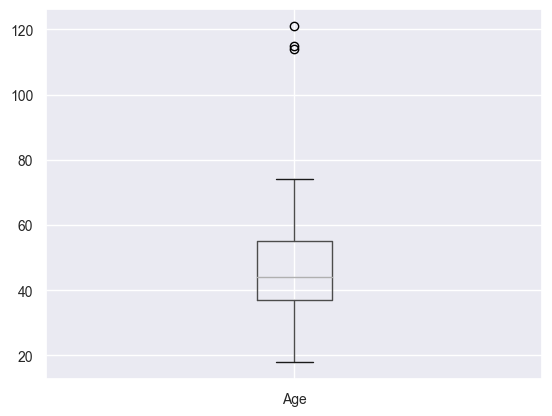

In [749]:
# find the outliers in Age column
dfYear = df[['Age']]
dfYear.boxplot(fontsize=10)

In [750]:
join_df['Age'].describe()  

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [751]:
# Calculate for each quantile of income to replace the outliers in the "Age" column.

q0_inc = np.percentile (join_df['Income'], 0, interpolation='midpoint')
print(f'For the Q0 quantile of the Income column is {q0_inc}')
q1_inc = np.percentile (join_df['Income'], 25, interpolation='midpoint')
print(f'For the Q1 quantile of the Income column is {q1_inc}')
q2_inc = np.percentile (join_df['Income'], 50, interpolation='midpoint')
print(f'For the Q2 quantile of the Income column is {q2_inc}')
q3_inc = np.percentile (join_df['Income'], 75, interpolation='midpoint')
print(f'For the Q3 quantile of the Income column is {q3_inc}')
q4_inc = np.percentile (join_df['Income'], 100, interpolation='midpoint')
print(f'For the Q4 quantile of the Income column is {q4_inc}')

For the Q0 quantile of the Income column is 1730.0
For the Q1 quantile of the Income column is 35533.5
For the Q2 quantile of the Income column is 51400.5
For the Q3 quantile of the Income column is 68334.0
For the Q4 quantile of the Income column is 666666.0


In [752]:
# Calculate for each quantile of Age to replace the outliers in the "Age" column.

q0_x = np.percentile (join_df['Age'], 0, interpolation='midpoint')
print(f'For the Q0 quantile of the Age column is {q0_x}')
q1_x = np.percentile (join_df['Age'], 25, interpolation='midpoint')
print(f'For the Q1 quantile of the Age column is {q1_x}')
q2_x = np.percentile (join_df['Age'], 50, interpolation='midpoint')
print(f'For the Q2 quantile of the Age column is {q2_x}')
q3_x = np.percentile (join_df['Age'], 75, interpolation='midpoint')
print (f'For the Q3 quantile of the Age column is {q3_x}')
q4_x = np.percentile (join_df['Age'], 100, interpolation='midpoint')
print(f'For the Q4 quantile of the Age column is {q4_x}')
iqr_yb = (q3_x - q1_x)
print(f'The IQR of the age column is {iqr_yb}')

lowerbound = q1_x - (1.5 *iqr_yb)
upperbound = q3_x + (1.5 *iqr_yb)

print (f'the lower outliers limit of the Age column is {lowerbound}')
print (f'the upper outliers limit of the Age column is {upperbound}')

For the Q0 quantile of the Age column is 18.0
For the Q1 quantile of the Age column is 37.0
For the Q2 quantile of the Age column is 44.0
For the Q3 quantile of the Age column is 55.0
For the Q4 quantile of the Age column is 121.0
The IQR of the age column is 18.0
the lower outliers limit of the Age column is 10.0
the upper outliers limit of the Age column is 82.0


In [753]:
# Check the data of Age column that have value higher that upperbound, we call it as outliers

join_df.loc[join_df['Age'] >= upperbound]

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,114,6. Old,2n Cycle,Divorced,36640.0,1,0,2013-09-26,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,121,6. Old,2n Cycle,Single,60182.0,0,1,2014-05-17,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,115,6. Old,PhD,Together,83532.0,0,0,2013-09-26,...,1,0,0,1,0,0,0,3,11,0


In [754]:
# Create the functions to grouping the income category, where in the category we will check the mode of the "Age" column to substitute for the outliers value.

modus1 = join_df.loc[(join_df['Age'] >= q0_x) & (join_df['Age'] <= q1_x)]['Age'].mode()[0] 
modus2 = join_df.loc[(join_df['Age'] >= q1_x) & (join_df['Age'] <= q2_x)]['Age'].mode()[0] 
modus3 = join_df.loc[(join_df['Age'] >= q2_x) & (join_df['Age'] <= q3_x)]['Age'].mode()[0] 
modus4 = join_df.loc[(join_df['Age'] >= q3_x) & (join_df['Age'] <= q4_x)]['Age'].mode()[0]


def new_year_birth(join_df):
    if join_df['Age'] > upperbound:
        if join_df['Income'] <= q1_inc and join_df['Income'] >= q0_inc:
            return modus1
        elif join_df['Income'] <= q2_inc and join_df['Income'] >= q1_inc:
            return modus2
        elif join_df['Income'] <= q3_inc and join_df['Income'] >= q2_inc:
            return modus3
        else:
            return modus4
    else:
        return join_df['Age']

join_df['Age'] = join_df.apply(new_year_birth, axis=1)

In [755]:
join_df.query("ID == 7829 or ID == 11004 or ID == 1150")

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,38,6. Old,2n Cycle,Divorced,36640.0,1,0,2013-09-26,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,44,6. Old,2n Cycle,Single,60182.0,0,1,2014-05-17,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,58,6. Old,PhD,Together,83532.0,0,0,2013-09-26,...,1,0,0,1,0,0,0,3,11,0


In [756]:
# Change the value of "Age" and "Age_category" columns

for i in range (len(join_df)):
    if join_df.ID[i] == 7829 or 11004 or 1150:
        join_df.Year_Birth[i] = 2014-join_df.Age[i]
        join_df.Age_category[i] = labelage(join_df.Age[i])
    else:
        continue

In [757]:
# Check that the three columns with Age outliers value, already change with new correct data.

join_df.query("ID == 7829 or ID == 11004 or ID == 1150")

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1976,38,4. Adult,2n Cycle,Divorced,36640.0,1,0,2013-09-26,...,5,0,0,0,0,0,1,3,11,0
239,11004,1970,44,4. Adult,2n Cycle,Single,60182.0,0,1,2014-05-17,...,4,0,0,0,0,0,0,3,11,0
339,1150,1956,58,5. Elderly,PhD,Together,83532.0,0,0,2013-09-26,...,1,0,0,1,0,0,0,3,11,0


### Income Outliers

In this df dataset we have an outliers in "Income" column that should be cleaned up. I chose this method to keep data completeness.
Based on the Normality Test before, We got that Income columns is not normal distribution with p-value is zero (0). So we will replance the Income Outliers data by using Income Median Data.

<Axes: >

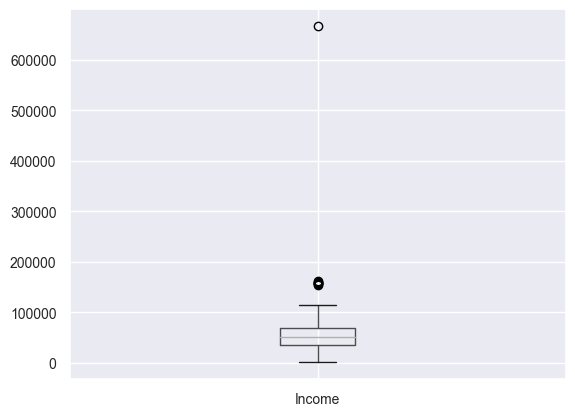

In [758]:
# find the outliers in A Income olumn
dfYear = df[['Income']]
dfYear.boxplot(fontsize=10)

In [759]:
join_df['Income'].describe()

count      2240.000000
mean      52233.434821
std       25053.855829
min        1730.000000
25%       35538.750000
50%       51400.500000
75%       68325.000000
max      666666.000000
Name: Income, dtype: float64

In [760]:
# Calculate for each quantile of income to replace the outliers in the "Income" column.

q0_inc = np.percentile (join_df['Income'], 0, interpolation='midpoint')
print(f'For the Q0 quantile of the Income column is {q0_inc}')
q1_inc = np.percentile (join_df['Income'], 25, interpolation='midpoint')
print(f'For the Q1 quantile of the Income column is {q1_inc}')
q2_inc = np.percentile (join_df['Income'], 50, interpolation='midpoint')
print(f'For the Q2 quantile of the Income column is {q2_inc}')
q3_inc = np.percentile (join_df['Income'], 75, interpolation='midpoint')
print(f'For the Q3 quantile of the Income column is {q3_inc}')
q4_inc = np.percentile (join_df['Income'], 100, interpolation='midpoint')
print(f'For the Q4 quantile of the Income column is {q4_inc}')

iqr_inc = (q3_inc - q1_inc)
print(f'The IQR of the Income column is {iqr_inc}')

lowerbound_inc = q1_inc - (1.5 *iqr_inc)
upperbound_inc = q3_inc + (1.5 *iqr_inc)

print (f'the lower outliers limit of the Income column is {lowerbound_inc}')
print (f'the upper outliers limit of the Income column is {upperbound_inc}')

For the Q0 quantile of the Income column is 1730.0
For the Q1 quantile of the Income column is 35533.5
For the Q2 quantile of the Income column is 51400.5
For the Q3 quantile of the Income column is 68334.0
For the Q4 quantile of the Income column is 666666.0
The IQR of the Income column is 32800.5
the lower outliers limit of the Income column is -13667.25
the upper outliers limit of the Income column is 117534.75


In [761]:
# Check the data of Income column that have value higher that upperbound, we call it as outliers

join_df.loc[join_df['Income'] >= upperbound_inc]

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,41,4. Adult,PhD,Married,157243.0,0,1,2014-03-01,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,38,4. Adult,PhD,Together,162397.0,1,1,2013-06-03,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,39,4. Adult,Graduation,Divorced,153924.0,0,0,2014-02-07,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,32,4. Adult,PhD,Married,160803.0,0,0,2012-08-04,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,43,4. Adult,Master,Together,157733.0,1,0,2013-06-04,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,37,4. Adult,Graduation,Together,157146.0,0,0,2013-04-29,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,65,5. Elderly,PhD,Married,156924.0,0,0,2013-08-29,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,37,4. Adult,Graduation,Together,666666.0,1,0,2013-06-02,...,6,0,0,0,0,0,0,3,11,0


In [762]:
# Change the value of Income Outliers

def out_Inc(join_df):
    if join_df['Income'] > upperbound_inc:
        return q2_inc
    else:
        return join_df['Income']

join_df['Income'] = join_df.apply(out_Inc, axis=1)

In [763]:
# Check that the three columns with Income outliers value, already change with new correct data.

join_df.query("ID == 8475 or ID == 1503 or ID == 5555 or ID == 1501	 or ID == 5336 or ID == 4931 or ID == 11181 or ID == 9432")

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,41,4. Adult,PhD,Married,51400.5,0,1,2014-03-01,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,38,4. Adult,PhD,Together,51400.5,1,1,2013-06-03,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,39,4. Adult,Graduation,Divorced,51400.5,0,0,2014-02-07,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,32,4. Adult,PhD,Married,51400.5,0,0,2012-08-04,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,43,4. Adult,Master,Together,51400.5,1,0,2013-06-04,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,37,4. Adult,Graduation,Together,51400.5,0,0,2013-04-29,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,65,5. Elderly,PhD,Married,51400.5,0,0,2013-08-29,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,37,4. Adult,Graduation,Together,51400.5,1,0,2013-06-02,...,6,0,0,0,0,0,0,3,11,0


## 7. Data Preparations

### Add the Income Categories Column

To make easier to analyze we also create group category for column income, based on the worldback data we divided income into 4 categories :
the reference can be accessed [click here](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html)

1. Lower
2. Lower-Middle
3. Upper-Middle
4. Upper

We devided it from the min, Q1, Q2, Q3, Max

In [764]:
# Create Grouping for Age Category based of Quantile and create the column

def labelincome(x):
    if x <= 35533.5:
        return '1. Lower'
    elif x <= 51400.5:
        return '2. Lower-Middle'
    elif x <= 68334.0:
        return '3. Upper-Middle'
    else:
        return '4. Upper'
    
join_df.insert(7, column='Income_category', value=df['Income'].apply(labelincome))

join_df.head ()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,5. Elderly,Graduation,Single,58138.0,3. Upper-Middle,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,5. Elderly,Graduation,Single,46344.0,2. Lower-Middle,1,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,5. Elderly,Graduation,Together,71613.0,4. Upper,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,4. Adult,Graduation,Together,26646.0,1. Lower,1,0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,4. Adult,PhD,Married,58293.0,3. Upper-Middle,1,0,...,5,0,0,0,0,0,0,3,11,0


### Change The Marital_Status Column Value

Due to there are so many categories in Marital_Status column value, we do a simplification based on the similarity of each status. This needed to make it easier to analyze the data
* Together = Married
* YOLO = Single
* Absurd = Single
* Alone = Single


In [765]:
# replace several values
replace_values_mar = {
                'Together' : 'Married',
                'YOLO' : 'Single',
                'Absurd' : 'Single',
                'Alone' : 'Single'
}

join_df['Marital_Status'].replace(replace_values_mar, inplace=True)

In [766]:
# check number of each value in marital_status column
join_df.Marital_Status.value_counts()

Marital_Status
Married     1444
Single       487
Divorced     232
Widow         77
Name: count, dtype: int64

In [767]:
# replace several values
replace_values_cat = {
                'Married' : '1. Married',
                'Single' : '2. Single',
                'Divorced' : '3. Divorced',
                'Widow' : '4. Widow'
}

join_df['Marital_Status'].replace(replace_values_cat, inplace=True)

### Change The Education Column Value

Based on the reference that can get source, 2n Cycle is the same with Master Program for Education. The dataset can be accessed [click here](https://www.unibo.it/en/teaching/enrolment-transfer-and-final-examination/the-university-system/what-is-a-second-cycle-degree-programme#:~:text=The%20second%20cycle%20degree%20programme%20is%20the%20second,credits%20%28CFU%29%20through%20a%20maximum%20of%2012%20exams.).


In [768]:
# replace the value of 2n cycle

replace_values = {
            '2n Cycle' : 'Master'
}

join_df['Education'].replace(replace_values, inplace=True)

In [769]:
# replace several values
replace_values_edu = {
                'Basic' : '1. Basic',
                'Graduation' : '2. Graduation',
                'Master' : '3. Master',
                'PhD' : '4. PhD'
}

join_df['Education'].replace(replace_values_edu, inplace=True)

### Add Some Columns that needed to help the Data Analysis Step

To help the data analysis step, so we create and add some columns to make Data Analysis become easier

1. TotalMnt = is the total amount of all products

TotalMnt = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds

2. TotalAcceptedCmp = is the total campaign that received by each customer

TotalAcceptedCmp = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5

In [770]:
# Create the TotalMnt Column 

join_df.insert(18, column="TotalMnt", value=join_df['MntWines']+join_df['MntFruits']+join_df['MntMeatProducts']+join_df['MntFishProducts']+join_df['MntSweetProducts']+join_df['MntGoldProds'])
join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,5,0,0,0,0,0,0,3,11,0


In [771]:
# Create the TotalAcceptedCmp Column 

join_df.insert(29, column="TotalAcceptedCmp", value=join_df['AcceptedCmp1']+join_df['AcceptedCmp2']+join_df['AcceptedCmp3']+join_df['AcceptedCmp4']+join_df['AcceptedCmp5']+join_df['Response'])
join_df.head()


,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,TotalAcceptedCmp,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,0,0,0,0,0,1,0,3,11,1
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,0,0,0,0,0,0,3,11,0
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,0,0,0,0,0,0,3,11,0
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,0,0,0,0,0,0,3,11,0
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,0,0,0,0,0,0,3,11,0


In [772]:
# Create the campaignAccept Column

join_df.insert(30, column="campaignAccept", value=join_df['TotalAcceptedCmp'])


In [773]:
# replace several values
replace_values_cmp = {
                0 : 'Not Accept',
                1 : 'Accept',
                2 : 'Accept',
                3 : 'Accept',
                4 : 'Accept',
                5 : 'Accept',
}

join_df['campaignAccept'].replace(replace_values_cmp, inplace=True)

### Drop the column that not used on the Data Analysis

On this dataset there are some columns not used on this data analysis, it because there is no insight that we can get from this column :
* Drop Z_CostContact
* Drop Z_Revenue

In [774]:
# drop Z_CostContact and Z_Revenue
join_df.drop(columns=['Z_CostContact'], axis=1, inplace=True)
# drop Z_CostContact and Z_Revenue
join_df.drop(columns=['Z_Revenue'], axis=1, inplace=True)

### Save clean data into new csv file

In [775]:
# saving data to csv
join_df.to_csv("clean_raw_data_ver1.csv")

In [776]:
# saving data to xlsx
join_df.to_excel(f"clean_raw_data_ver1.xlsx")

### 8. GROUPING EACH COLUMNS FOR CORRELATION PROCESS

Grouping process for each column that have Numerical Discrete Data Type with outliers, due to the discrete data with the outliers very sensitive to be inputed on phik correlation checking. One of solution is create grouping 

* Discrete:  MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

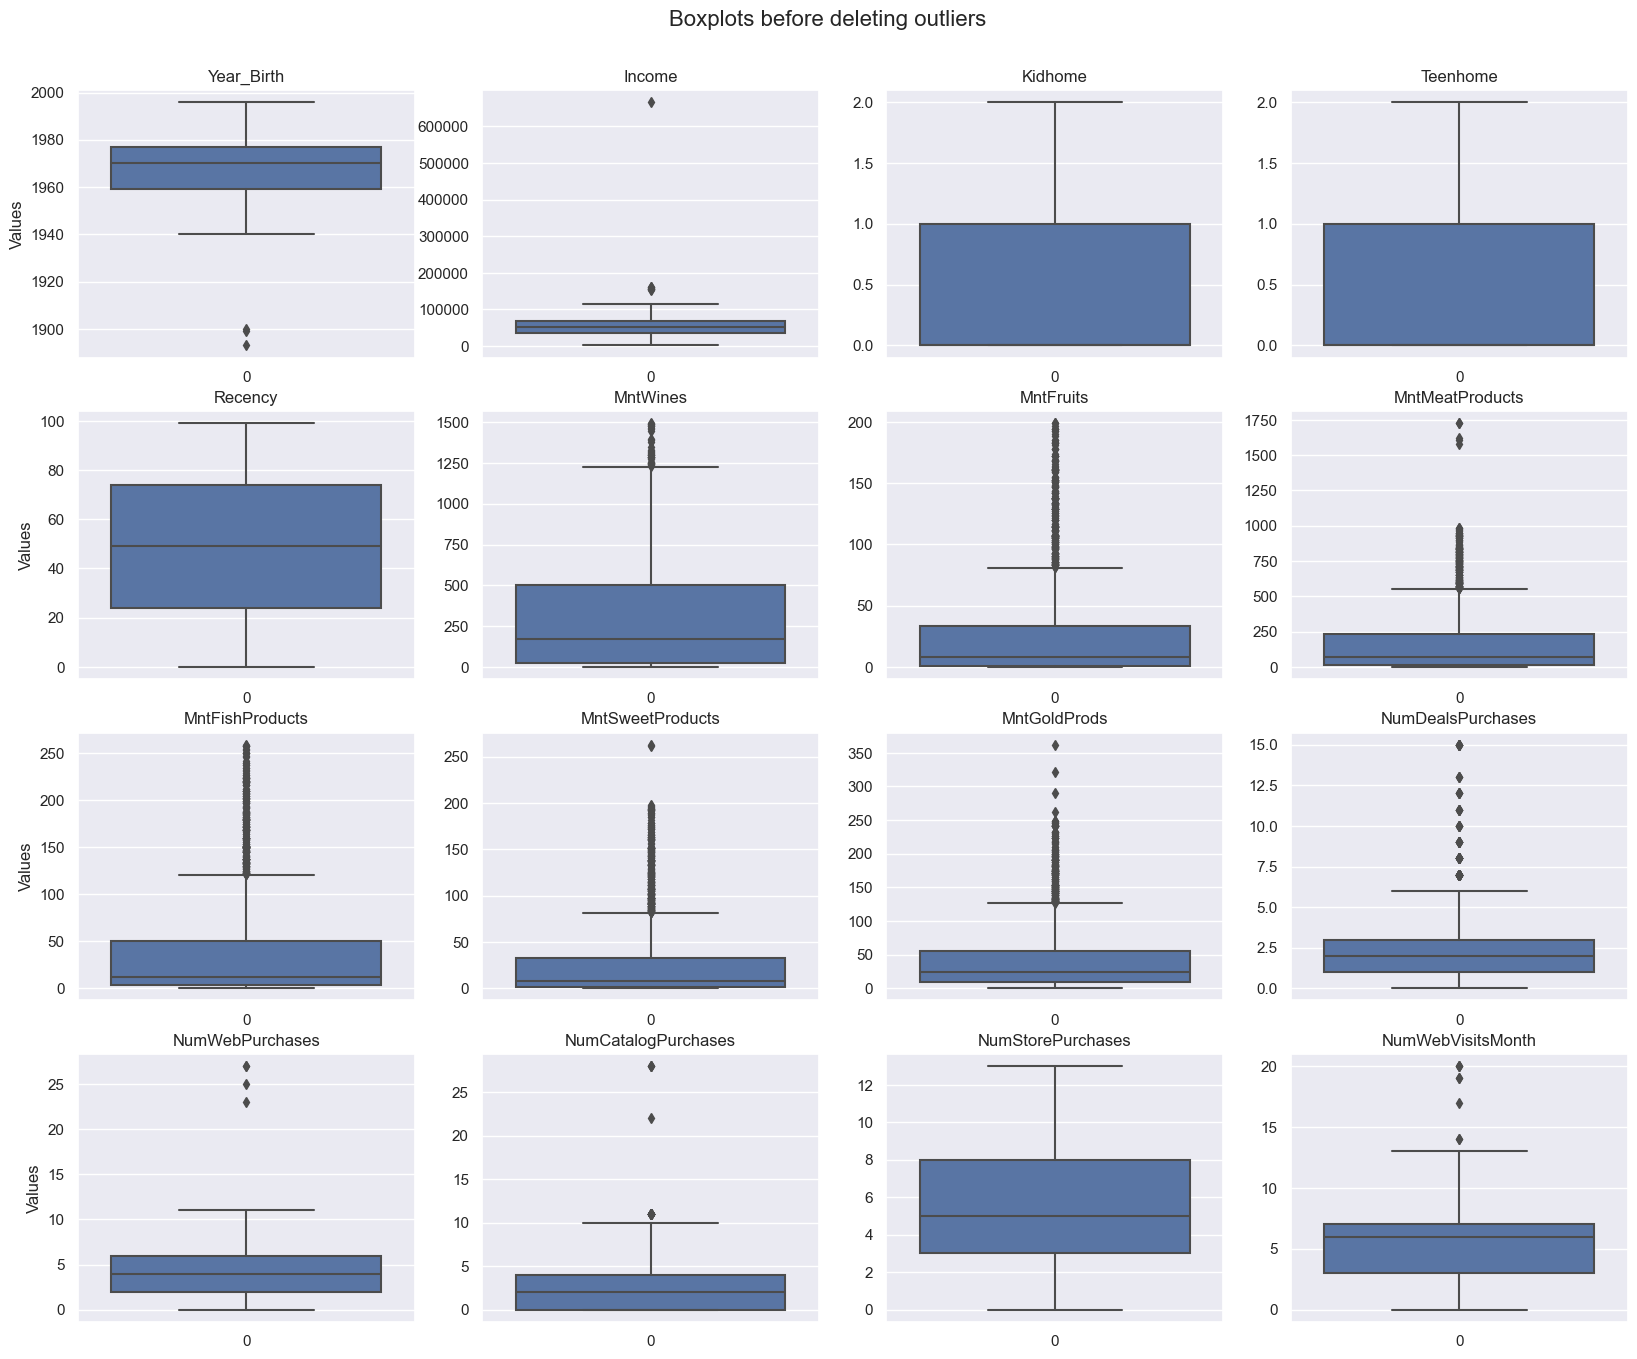

In [777]:
#list numeric columns of the data set
numeric_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=4, suptitle='Boxplots before deleting outliers')

### A. MntWines_Category

In [778]:
join_df['MntWines'].describe()  

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

In [779]:
# Create Grouping for Wines Amount Purchases based of Quantile and create the column

def labelWines(x):
    if x <= 23.75:
        return 'Low Amount Purchases'
    elif x <= 173.50:
        return 'Medium to Low Amount Purchases'
    elif x <= 504.25 :
        return 'Medium to High Amount Purchases'
    else:
        return 'High Amount Purchases'
    
join_df['MntWines_Cat'] = join_df['MntWines'].apply(labelWines)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,TotalAcceptedCmp,campaignAccept,Complain,Response,MntWines_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,0,0,0,0,0,1,Accept,0,1,High Amount Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,0,0,0,0,0,Not Accept,0,0,Low Amount Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,0,0,0,0,0,Not Accept,0,0,Medium to High Amount Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,0,0,0,0,0,Not Accept,0,0,Low Amount Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,0,0,0,0,0,Not Accept,0,0,Medium to Low Amount Purchases


### B. MntFruits_Category

In [780]:
join_df['MntFruits'].describe()  

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

In [781]:
# Create Grouping for Fruits Amount Purchases based of Quantile and create the column

def labelFruits(x):
    if x <= 1.00:
        return 'Low Amount Purchases'
    elif x <= 8.00:
        return 'Medium to Low Amount Purchases'
    elif x <= 33.00 :
        return 'Medium to High Amount Purchases'
    else:
        return 'High Amount Purchases'
    
join_df['MntFruits_Cat'] = join_df['MntFruits'].apply(labelFruits)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,TotalAcceptedCmp,campaignAccept,Complain,Response,MntWines_Cat,MntFruits_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,0,0,0,0,1,Accept,0,1,High Amount Purchases,High Amount Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,0,0,0,0,Not Accept,0,0,Low Amount Purchases,Low Amount Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,0,0,0,0,Not Accept,0,0,Medium to High Amount Purchases,High Amount Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,0,0,0,0,Not Accept,0,0,Low Amount Purchases,Medium to Low Amount Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,0,0,0,0,Not Accept,0,0,Medium to Low Amount Purchases,High Amount Purchases


### C. MntMeatProducts_Category

In [782]:
join_df['MntMeatProducts'].describe()  

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [783]:
# Create Grouping for Meat Amount Purchases based of Quantile and create the column

def labelMeat(x):
    if x <= 16.00:
        return 'Low Amount Purchases'
    elif x <= 67.00:
        return 'Medium to Low Amount Purchases'
    elif x <= 232.00 :
        return 'Medium to High Amount Purchases'
    else:
        return 'High Meat Amount Purchases'
    
join_df['MntMeat_Cat'] = join_df['MntMeatProducts'].apply(labelMeat)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,TotalAcceptedCmp,campaignAccept,Complain,Response,MntWines_Cat,MntFruits_Cat,MntMeat_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,0,0,0,1,Accept,0,1,High Amount Purchases,High Amount Purchases,High Meat Amount Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,0,0,0,Not Accept,0,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,0,0,0,Not Accept,0,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,0,0,0,Not Accept,0,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,0,0,0,Not Accept,0,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases


### D. MntFishProducts_Category

In [784]:
join_df['MntFishProducts'].describe()  

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

In [785]:
# Create Grouping for Fish Amount Purchases based of Quantile and create the column

def labelFish(x):
    if x <= 3.00:
        return 'Low Amount Purchases'
    elif x <= 12.00:
        return 'Medium to Low Amount Purchases'
    elif x <= 50.00 :
        return 'Medium to High Amount Purchases'
    else:
        return 'High Amount Purchases'
    
join_df['MntFish_Cat'] = join_df['MntFishProducts'].apply(labelFish)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,AcceptedCmp1,AcceptedCmp2,TotalAcceptedCmp,campaignAccept,Complain,Response,MntWines_Cat,MntFruits_Cat,MntMeat_Cat,MntFish_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,0,0,1,Accept,0,1,High Amount Purchases,High Amount Purchases,High Meat Amount Purchases,High Amount Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,0,0,Not Accept,0,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,0,0,Not Accept,0,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,0,0,Not Accept,0,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,0,0,Not Accept,0,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases


### E. MntSweetProducts_Category

In [786]:
join_df['MntSweetProducts'].describe()  

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64

In [787]:
# Create Grouping for Sweet Amount Purchases based of Quantile and create the column

def labelSweet(x):
    if x <= 1.00:
        return 'Low Amount Purchases'
    elif x <= 8.00:
        return 'Medium to Low Amount Purchases'
    elif x <= 33.00 :
        return 'Medium to High Amount Purchases'
    else:
        return 'High Amount Purchases'
    
join_df['MntSweet_Cat'] = join_df['MntSweetProducts'].apply(labelSweet)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,AcceptedCmp2,TotalAcceptedCmp,campaignAccept,Complain,Response,MntWines_Cat,MntFruits_Cat,MntMeat_Cat,MntFish_Cat,MntSweet_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,0,1,Accept,0,1,High Amount Purchases,High Amount Purchases,High Meat Amount Purchases,High Amount Purchases,High Amount Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,0,Not Accept,0,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,0,Not Accept,0,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,0,Not Accept,0,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,0,Not Accept,0,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases


### F. MntGoldProds_Category

In [788]:
join_df['MntGoldProds'].describe()  

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64

In [789]:
# Create Grouping for Gold Amount Purchases based of Quantile and create the column

def labelGold(x):
    if x <= 9.00:
        return 'Low Amount Purchases'
    elif x <= 24.00:
        return 'Medium to Low Amount Purchases'
    elif x <= 56.00 :
        return 'Medium to High Amount Purchases'
    else:
        return 'High Amount Purchases'
    
join_df['MntGold_Cat'] = join_df['MntGoldProds'].apply(labelGold)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,TotalAcceptedCmp,campaignAccept,Complain,Response,MntWines_Cat,MntFruits_Cat,MntMeat_Cat,MntFish_Cat,MntSweet_Cat,MntGold_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,1,Accept,0,1,High Amount Purchases,High Amount Purchases,High Meat Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,Not Accept,0,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,Not Accept,0,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,Not Accept,0,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,Not Accept,0,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases


### G. NumDealsPurchases_Category

In [790]:
join_df['NumDealsPurchases'].describe()  

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

In [791]:
# Create Grouping for Number Deal Purchases based of Quantile and create the column

def labelDeal(x):
    if x <= 1.00:
        return 'Low Number Purchases'
    elif x <= 2.00:
        return 'Medium to Low Number Purchases'
    elif x <= 3.00:
        return 'Medium to High Number Purchases'
    else:
        return 'High Number Purchases'
    
join_df['NumDeal_Cat'] = join_df['NumDealsPurchases'].apply(labelDeal)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,campaignAccept,Complain,Response,MntWines_Cat,MntFruits_Cat,MntMeat_Cat,MntFish_Cat,MntSweet_Cat,MntGold_Cat,NumDeal_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,Accept,0,1,High Amount Purchases,High Amount Purchases,High Meat Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,Medium to High Number Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,Not Accept,0,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,Not Accept,0,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Low Number Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,Not Accept,0,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,Not Accept,0,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases,High Number Purchases


### H. NumWebPurchases_Category

In [792]:
join_df['NumWebPurchases'].describe()  

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

In [793]:
# Create Grouping for Number Web Purchases based of Quantile and create the column

def labelWeb(x):
    if x <= 2.00:
        return 'Low Number Purchases'
    elif x <= 4.00:
        return 'Medium to Low Number Purchases'
    elif x <= 6.00:
        return 'Medium to High Number Purchases'
    else:
        return 'High Number Purchases'
    
join_df['NumWeb_Cat'] = join_df['NumWebPurchases'].apply(labelDeal)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,Complain,Response,MntWines_Cat,MntFruits_Cat,MntMeat_Cat,MntFish_Cat,MntSweet_Cat,MntGold_Cat,NumDeal_Cat,NumWeb_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,0,1,High Amount Purchases,High Amount Purchases,High Meat Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,Medium to High Number Purchases,High Number Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Low Number Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Low Number Purchases,High Number Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Medium to Low Number Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases,High Number Purchases,High Number Purchases


### I. NumCatalogPurchases_Category

In [794]:
join_df['NumCatalogPurchases'].describe()  

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

In [795]:
# Create Grouping for Number Catalog Purchases based of Quantile and create the column

def labelCatalog(x):
    if x <= 0.00:
        return 'Low Number Purchases'
    elif x <= 2.00:
        return 'Medium to Low Number Purchases'
    elif x <= 4.00:
        return 'Medium to High Number Purchases'
    else:
        return 'High Number Purchases'
    
join_df['NumCatalog_Cat'] = join_df['NumCatalogPurchases'].apply(labelCatalog)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,Response,MntWines_Cat,MntFruits_Cat,MntMeat_Cat,MntFish_Cat,MntSweet_Cat,MntGold_Cat,NumDeal_Cat,NumWeb_Cat,NumCatalog_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,1,High Amount Purchases,High Amount Purchases,High Meat Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,Medium to High Number Purchases,High Number Purchases,High Number Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Low Number Purchases,High Number Purchases,Medium to Low Number Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases,High Number Purchases,High Number Purchases,Medium to High Number Purchases


### J. NumStorePurchases_Category

In [796]:
join_df['NumStorePurchases'].describe()  

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

In [797]:
# Create Grouping for Number Store Purchases based of Quantile and create the column

def labelStore(x):
    if x <= 3.00:
        return 'Low Number Purchases'
    elif x <= 5.00:
        return 'Medium to Low Number Purchases'
    elif x <= 8.00:
        return 'Medium to High Number Purchases'
    else:
        return 'High Number Purchases'
    
join_df['NumStore_Cat'] = join_df['NumStorePurchases'].apply(labelStore)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,MntWines_Cat,MntFruits_Cat,MntMeat_Cat,MntFish_Cat,MntSweet_Cat,MntGold_Cat,NumDeal_Cat,NumWeb_Cat,NumCatalog_Cat,NumStore_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,High Amount Purchases,High Amount Purchases,High Meat Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,Medium to High Number Purchases,High Number Purchases,High Number Purchases,Medium to Low Number Purchases
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Low Number Purchases,High Number Purchases,Medium to Low Number Purchases,High Number Purchases
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases,High Number Purchases,High Number Purchases,Medium to High Number Purchases,Medium to High Number Purchases


### K. NumWebVisitsMonth_Category

In [798]:
join_df['NumWebVisitsMonth'].describe()  

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

In [799]:
# Create Grouping for Number Web Visit per Month based of Quantile and create the column

def labelWebVIsit(x):
    if x <= 3.00:
        return 'Low Number Visit'
    elif x <= 6.00:
        return 'Medium to Low Number Visit'
    elif x <= 7.00:
        return 'Medium to High Number Visit'
    else:
        return 'High Number Visit'
    
join_df['NumWebVIsit_Cat'] = join_df['NumWebVisitsMonth'].apply(labelWebVIsit)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,MntFruits_Cat,MntMeat_Cat,MntFish_Cat,MntSweet_Cat,MntGold_Cat,NumDeal_Cat,NumWeb_Cat,NumCatalog_Cat,NumStore_Cat,NumWebVIsit_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,High Amount Purchases,High Meat Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,Medium to High Number Purchases,High Number Purchases,High Number Purchases,Medium to Low Number Purchases,Medium to High Number Visit
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Visit
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Low Number Purchases,High Number Purchases,Medium to Low Number Purchases,High Number Purchases,Medium to Low Number Visit
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Medium to Low Number Visit
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases,High Number Purchases,High Number Purchases,Medium to High Number Purchases,Medium to High Number Purchases,Medium to Low Number Visit


### L. Total Spend Amount Category

In [800]:
join_df['TotalMnt'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalMnt, dtype: float64

In [801]:
# Create Grouping for Total Amout All Products based of Quantile and create the column

def totalAmount(x):
    if x <= 68.75:
        return 'Low Number of Total Amount'
    elif x <= 396.00:
        return 'Medium to Low Number of Total Amount'
    elif x <= 1045.50:
        return 'Medium to High Number of Total Amount'
    else:
        return 'High Number of Total Amount'
    
join_df['TotalMnt_Cat'] = join_df['TotalMnt'].apply(totalAmount)

join_df.head()

,ID,Year_Birth,Age,Age_category,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,MntMeat_Cat,MntFish_Cat,MntSweet_Cat,MntGold_Cat,NumDeal_Cat,NumWeb_Cat,NumCatalog_Cat,NumStore_Cat,NumWebVIsit_Cat,TotalMnt_Cat
0,5524,1957,57,5. Elderly,2. Graduation,2. Single,58138.0,3. Upper-Middle,0,0,...,High Meat Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,Medium to High Number Purchases,High Number Purchases,High Number Purchases,Medium to Low Number Purchases,Medium to High Number Visit,High Number of Total Amount
1,2174,1954,60,5. Elderly,2. Graduation,2. Single,46344.0,2. Lower-Middle,1,1,...,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Visit,Low Number of Total Amount
2,4141,1965,49,5. Elderly,2. Graduation,1. Married,71613.0,4. Upper,0,0,...,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Low Number Purchases,High Number Purchases,Medium to Low Number Purchases,High Number Purchases,Medium to Low Number Visit,Medium to High Number of Total Amount
3,6182,1984,30,4. Adult,2. Graduation,1. Married,26646.0,1. Lower,1,0,...,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases,Medium to Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Medium to Low Number Visit,Low Number of Total Amount
4,5324,1981,33,4. Adult,4. PhD,1. Married,58293.0,3. Upper-Middle,1,0,...,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases,High Number Purchases,High Number Purchases,Medium to High Number Purchases,Medium to High Number Purchases,Medium to Low Number Visit,Medium to High Number of Total Amount


In [802]:
# saving data to csv
join_df.to_csv("raw_data_corr.csv")

In [803]:
# saving data to xlsx
join_df.to_excel("raw_data_corr.xlsx")

##